## Unsupervised Learning: Customer Segmentation
----------------------------------------
**Marks: 30**
-----------------------------------------

Welcome to the project on Unsupervised Learning. We will be using the Credit Card Customer Data for this project.


----------------------------
## Objective: 
-----------------------------

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank. This will help run personalized campaigns to target new customers as well as upsell to existing customers. 

--------------------------
## About the data:
--------------------------
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

- Sl_no - Customer Serial Number
- Customer Key - Customer identification
- Avg_Credit_Limit	- Average credit limit (currency is not specified, you can make an assumption around this)
- Total_Credit_Cards	- Total number of credit cards 
- Total_visits_bank	- Total bank visits
- Total_visits_online -	 Total online visits
- Total_calls_made - Total calls made

## Importing libraries and overview of the dataset

In [ ]:
#Importing all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture



!pip install scikit-learn-extra
#pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
#conda install -c conda-forge scikit-learn-extra --y
from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Credit Card Customer Data.xlsx to Credit Card Customer Data.xlsx


In [ ]:
data = pd.read_excel('Credit Card Customer Data.xlsx')
data.head()



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


#### Checking the info of the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are 660 observations and 7 columns in the dataset.
- All columns have 660 non-null values i.e. there are no missing values.
- All columns are of int64 data type.

**There are no missing values. Let us now figure out the uniques in each column.** 

In [ ]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has repeated values. We should treat the same accordingly before applying any algorithm.

## Data Preprocessing and Exploratory Data Analysis

In [ ]:
# Identifying the duplicated customer keys
duplicate_keys = data[data['Customer Key'].duplicated()]
print(duplicate_keys)

     Sl_No  Customer Key  ...  Total_visits_online  Total_calls_made
332    333         47437  ...                    1                 0
398    399         96929  ...                    2                 2
432    433         37252  ...                    1                 2
541    542         50706  ...                    2                 2
632    633         97935  ...                    7                 0

[5 rows x 7 columns]


In [ ]:
# Dropping duplicated keys

data = data.drop_duplicates(subset=['Customer Key'])
print(data[data['Customer Key'].duplicated()])

Empty DataFrame
Columns: [Sl_No, Customer Key, Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank, Total_visits_online, Total_calls_made]
Index: []


In [ ]:
data.nunique()


Sl_No                  655
Customer Key           655
Avg_Credit_Limit       109
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

We have done some basic checks. Now, let's drop the variables that are not required for our analysis.

In [ ]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

Now that we have dropped unnecessary column. We can again check for duplicates. Duplicates would mean customers with identical features.

In [ ]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


We can drop these duplicated rows from the data

In [ ]:
data=data[~data.duplicated()]

In [ ]:
data.shape

(644, 5)

- After removing duplicated keys and rows and unnecessary columns, there are 644 unique observations and 5 columns in our data.

#### Summary Statistics

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:**

* On average, a customer has more online visits compared to bank visits, and more calls made than both. 

* There is a very high max value(200k) for credit card limit compared to the lowest one (3k) 

* The average number of credit cards per person is about 4.7. 

#### Now let's go ahead with the exploring each variable at hand. We will check the distribution and outliers for each variable in the data.

Avg_Credit_Limit
Skew : 2.19


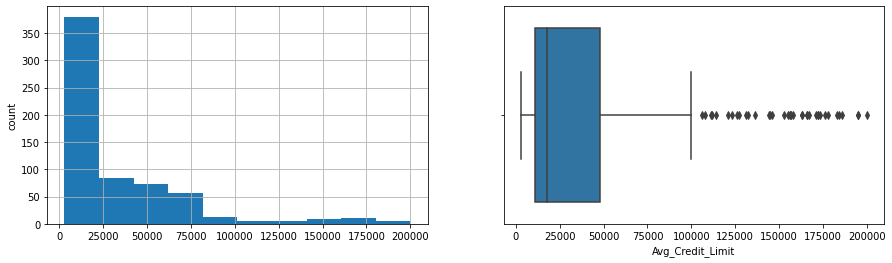

Total_Credit_Cards
Skew : 0.17


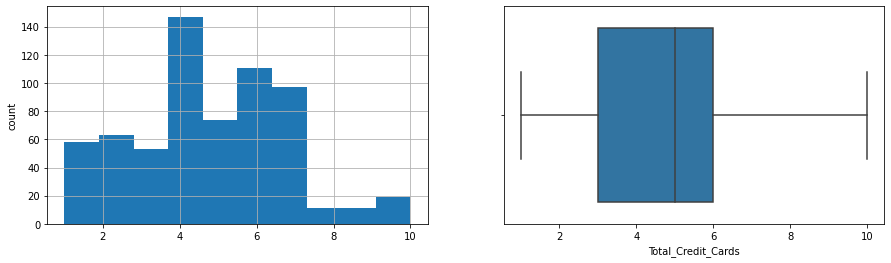

Total_visits_bank
Skew : 0.15


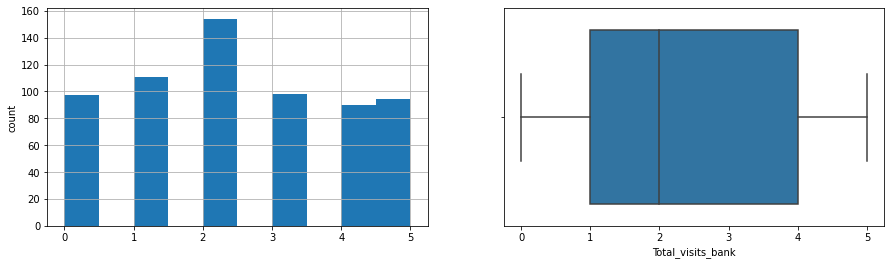

Total_visits_online
Skew : 2.21


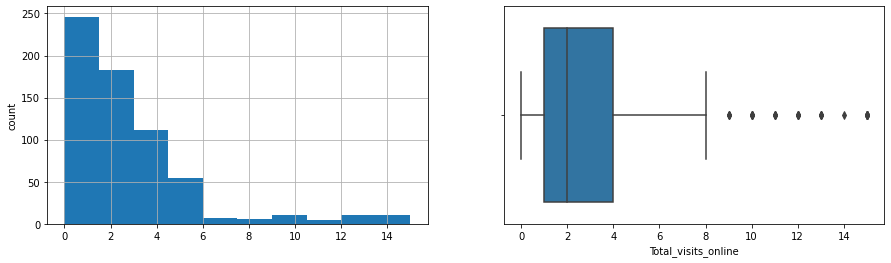

Total_calls_made
Skew : 0.65


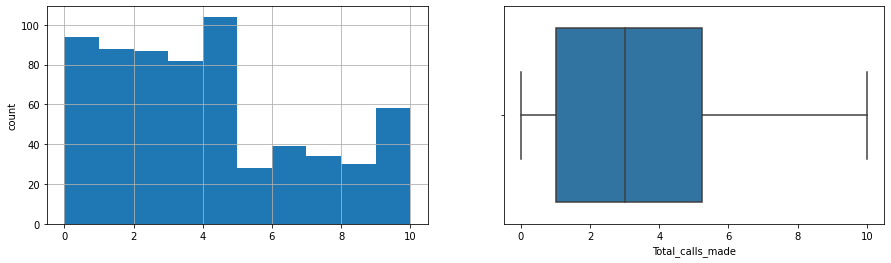

In [ ]:
 

for col in data.columns:
     print(col)
     print('Skew :',round(data[col].skew(),2))
     plt.figure(figsize=(15,4))
     plt.subplot(1,2,1)
     data[col].hist()
     plt.ylabel('count')
     plt.subplot(1,2,2)
     sns.boxplot(x=data[col])
     plt.show()

**Observations:**

* Average credit limit is heavily skewed to the right, and the boxplot shows that there are many outliers. 

* Total Bank visits seems fairly evenly distributed for each value between 1 to 5 visits

* Total online visits also seems skewed to the right 



**Now, let's check the correlation among different variables.**

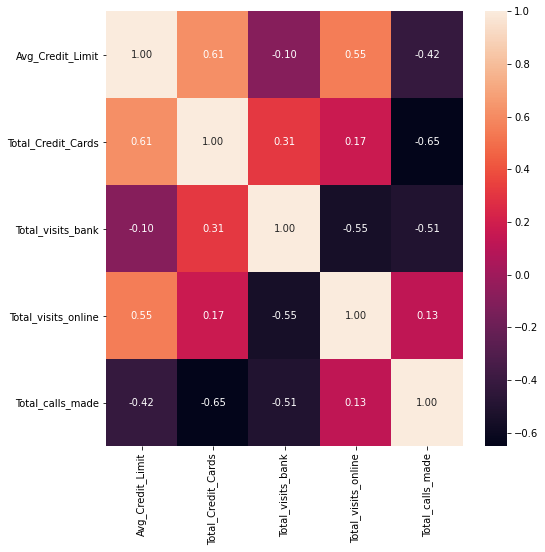

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

**Observation:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards Total_visits_online which can makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

#### Scaling the data

In [ ]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [ ]:
data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.750192,-1.239437,-0.858684,-0.549573,-1.253982
1,0.413280,-0.779381,-1.473803,2.495669,1.873420
2,0.413280,1.060843,-0.858684,0.127148,0.135974
3,-0.121485,0.140731,-0.858684,-0.549573,0.135974
4,1.750192,0.600787,-1.473803,3.172390,-0.211515


In [ ]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

## K-Means

Let us now fit k-means algorithm on our scaled data and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initializing a dictionary to store the SSE for each k
2. Running for a range of Ks and store SSE for each run
3. Plotting the SSE vs K and find the elbow

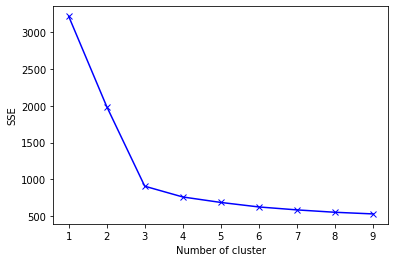

In [ ]:
# step 1
sse = {} 

# step 2 - iterating for a range of Ks and fit the scaled data to the algorithm. Using inertia attribute from the clustering object and 
# storing the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

# step 3
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

- Looking at the plot, we can say that elbow point is achieved for k=3.
- We will fit the k-means again with k=3 to get the labels.

In [ ]:
kmeans =  KMeans(n_clusters = 3, random_state = 1) #Applying the K-Means algorithm
kmeans.fit(data_scaled) #Fitting the kmeans function on the scaled data

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['Labels'] = kmeans.predict(data_scaled) #Saving the predictions on the scaled data from K-Means
data['Labels'] = kmeans.predict(data_scaled) #Saving the predictions on the scaled data from K-Means

* We chose random_state = 1 so that we can replicate these same exact results if we want to, since different iterations of the code may produce different results. 

* We chose k = 3 because the elbow plot shows that 3 is the number of groups after the last big drop of the curve, we want to choose the value which precedes the point at which the variation doesn't go down as quickly. 

We have generated the labels with k-means. Let us look at the various features based on the labels.

#### **Creating cluster profiles using the below summary statistics and box plots for each label**

In [ ]:
#Number of observations in each cluster
data.Labels.value_counts()

1    374
0    221
2     49
Name: Labels, dtype: int64

In [ ]:
#Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


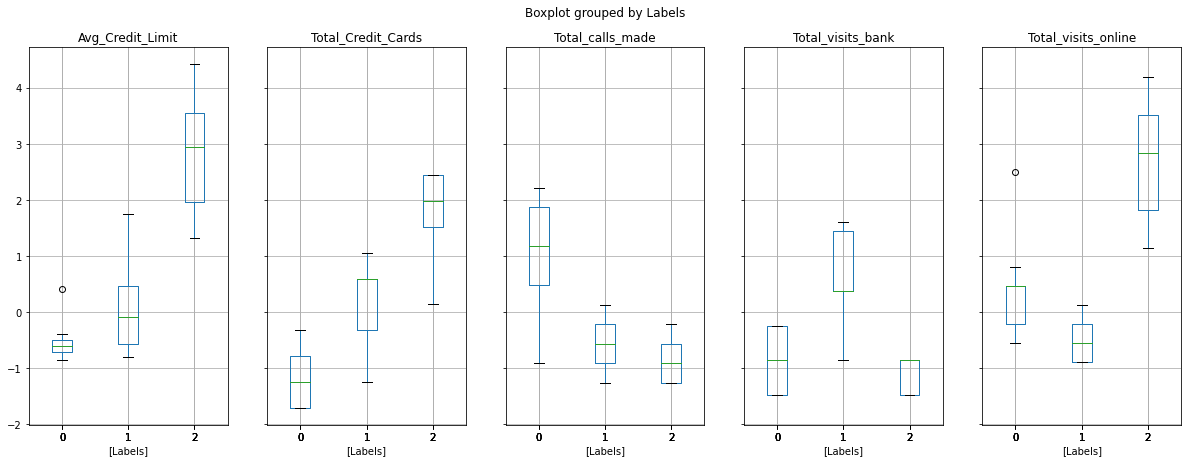

In [ ]:
#Visualizing different features w.r.t K-means labels
data_scaled_copy.boxplot(by = 'Labels', layout = (1,5),figsize=(20,7))
plt.show()

**Cluster Profiles:**

* Cluster 0 seems to be the group of customers with the lowest average credit limit and their main mode of communication with the bank is through phone calls and hence don't visit the bank or visit online very much. 

* Cluster 2 has considerably higher avarege credit limit, posess more credit cards, they don't visit the bank as much or do calls and do most of their visits online 

* Cluster 1 seems to be an "intermediate group" though they do tend to visit the bank more often than the other groups and also do less online visits. 

## Gaussian Mixture

Let's create clusters using Gaussian Mixture Models

**We will first apply the Gaussian Mixture algorithm on the scaled data with random_state = 1. Then, we will create cluster profiles using the below summary statistics and box plots for each label. Finally, we will compare the clusters from both algorithms - K-means and Gaussian Mixture.**


In [ ]:
gmm = GaussianMixture(n_components = 3, random_state = 1) #Applying the Gaussian Mixture algorithm
gmm.fit(data_scaled) #Fitting the gmm function on the scaled data

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
data['GmmLabels'] = gmm.predict(data_scaled)

In [ ]:
#Number of observations in each cluster
data.GmmLabels.value_counts()

1    374
0    221
2     49
Name: GmmLabels, dtype: int64

In [ ]:
#Calculating summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]

mean = data.groupby('GmmLabels').mean()
median = data.groupby('GmmLabels').median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


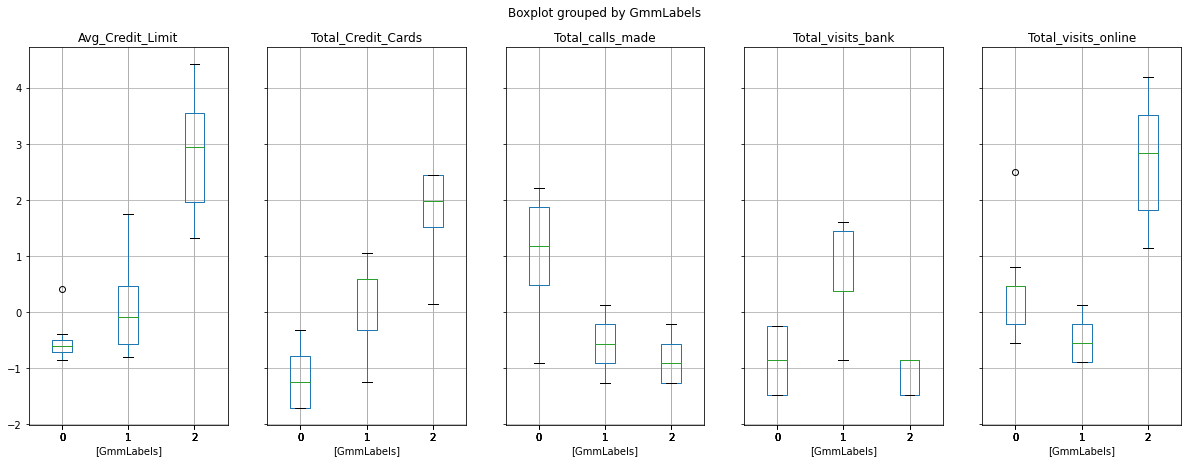

In [ ]:
# plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","GmmLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1,5),figsize=(20,7))
plt.show()

**Cluster Profiles:**

* Same profiles as in K-Means

**Comparing Clusters:**

* The distributions of both the number of observations in each cluster as well as the boxplots show identical results. 

## K-Medoids

**We will apply the same process with the K-Medoids algorithm**

In [ ]:
!pip install scikit-learn-extra

In [ ]:
#!pip install scikit-learn-extra
#!conda install -c conda-forge scikit-learn-extra

#from sklearn_extra.cluster import KMedoids

kmedo = KMedoids(n_clusters = 3, random_state = 1) #Apply the K-Medoids algorithm
kmedo.fit(data_scaled) #Fit the kmedo function on the scaled data

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
data['kmedoLabels'] = kmedo.predict(data_scaled)

In [ ]:
#Number of observations in each cluster
data.kmedoLabels.value_counts()

2    289
0    222
1    133
Name: kmedoLabels, dtype: int64

In [ ]:
#Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()
median = data.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0


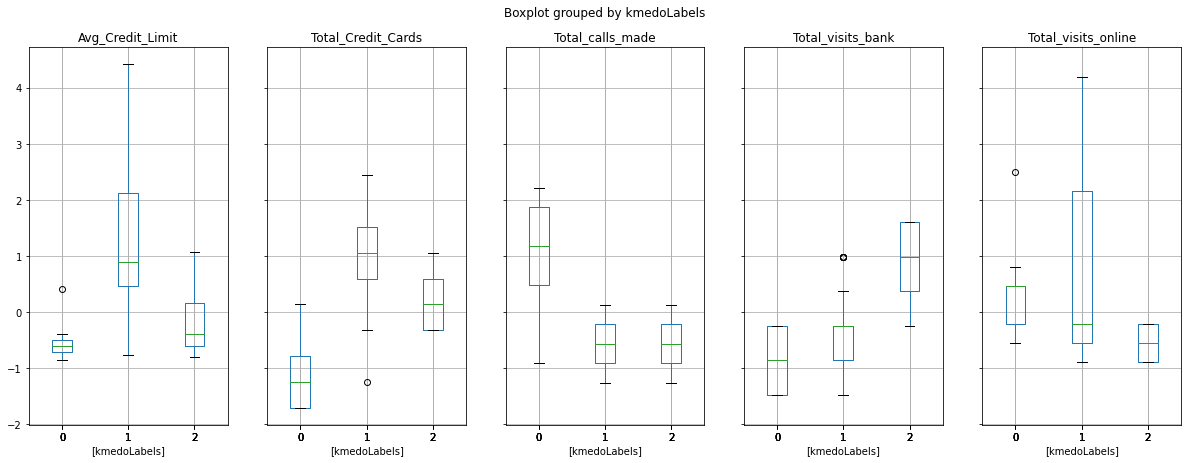

In [ ]:
#plotting boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit",	"Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","kmedoLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1,5),figsize=(20,7))
plt.show()

Let's compare the clusters from K-Means and K-Medoids 

In [ ]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis=1)[original_features]
comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12216.216216,12239.819005,2.423423,2.411765,0.950450,0.945701,3.554054,3.561086,6.878378,6.891403
group_1 Mean,85052.631579,33893.048128,7.030075,5.508021,1.691729,3.489305,4.639098,0.975936,1.969925,1.997326
group_2 Mean,28449.826990,140102.040816,5.363322,8.775510,3.830450,0.591837,0.982699,10.979592,1.851211,1.102041
group_0 Median,12000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
group_1 Median,68000.000000,31500.000000,7.000000,6.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000
group_2 Median,20000.000000,145000.000000,5.000000,9.000000,4.000000,1.000000,1.000000,11.000000,2.000000,1.000000


**Cluster Profiles:**

* Cluster 0: The customers that have a low avg credit limit, do most of their banking through calls instead of visting the bank or doing it online, and they also have a lower amount of credits cards on average. 

* Cluster 1: These customers have high avg credit limit, do most of their banking online, have a high number of credit cards on average and don't visit the bank very much or call. 

* Cluster 2: the "intermediate" group, which has more avg credit limit than cluster 0 but less than cluster 1. They also do more of their banking through actual visits compared to calls or online means. They also have more credit cards on average compared to cluster 0 but less than cluster 1. 

**Comparing Clusters:**

* We can see that K-Medoids are better at detecting outliers because the boxplots display more of them compared to K-Means

* There is also a more even split of the 3 clusters for K-Medoids compared to K-Means. Kedoids split: 289, 222, 133, K-Means split:  374, 221, 49

* There is a significantly higher spread on the IQR for the high average credit limit group in K-Medoids compared to K-Means